In [5]:
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr   
from IPython.display import Audio
import scipy.io.wavfile
import matplotlib.pyplot as plt
import wave
import os
%matplotlib inline

In [6]:
# 6.1 (a)
s1 = pd.read_csv('sounds/sound1.dat', header=None).as_matrix()
s2 = pd.read_csv('sounds/sound2.dat', header=None).as_matrix()
s = np.concatenate([s1,s2],axis=1).T

# 6.1 (b)
A = np.random.RandomState(12).rand(2,2)
np.linalg.inv(A) # proof that it's invertible
x0 = np.dot(A,s)

# 6.1 (c)
x = x0[:,np.random.RandomState(444).permutation(x0.shape[1])]

# 6.1 (d)
p1,_ = pearsonr(s[0,:],x[0,:])
p2,_ = pearsonr(s[0,:],x[1,:])
p3,_ = pearsonr(s[1,:],x[0,:])
p4,_ = pearsonr(s[1,:],x[1,:])

# 6.1 (e)
x -= x.mean(axis=1).reshape((2, 1))

# 6.1 (f)
w = np.random.RandomState(444).rand(2,2)

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def df(x):
    return 1 - 2 * sigmoid(x)

def delta_sigmoid(x):
    return np.exp(x) / (1 + np.exp(x)) ** 2

def delta2_sigmoid(x):
    numerator = np.exp(x) * (np.exp(x) - 1)
    denominator = (np.exp(x) + 1) ** 3
    return -(numerator / denominator)

# a) Update matrix DW using the "regular" gradient
def dW_regular(W, x, N, bell=False):
    dW = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            dW[i, j] += df(W[i].dot(x)) * x[j]
    dW = np.linalg.inv(W).T + dW
    # Bell-Snejowski approach to limit amplitudes
    if bell:
        dW[0,0] = 0
        dW[1,1] = 0
    return dW

# b) Update matrix DW using the natural gradient
# TODO: Not fully copied
def dW_natural(W, x, N, bell=False):
    dW = np.zeros((N, N))
    for i in range(N):
        logistic_f = df(W[i].dot(x))
        for j in range(N):
            for l in range(N):
                pass
    return None


def cost(x, w):
    wx = np.dot(w, x)
    return np.log(np.abs(w)) + np.log(delta_sigmoid(wx)).mean()

def delta_cost(x, w):
    wx = np.dot(w, x)
    # return x * delta2_sigmoid(wx) / delta_sigmoid(wx) + np.linalg.inv(w)
    # print(delta2_sigmoid(wx).shape)
    # print(delta_sigmoid(wx).shape)
    # print(np.linalg.inv(w).shape)
    return delta2_sigmoid(wx) / delta_sigmoid(wx) + np.linalg.inv(w)

initial_learning_rate = 0.1

import collections
print_every = 1000
avg_cost = collections.deque(maxlen=print_every)
for time, example in enumerate(x.T):
    learning_rate = initial_learning_rate / (time + 1)
    w += learning_rate * delta_cost(example, w)
    avg_cost.append(cost(x, w).mean())
    if time % print_every == 0:
        print(sum(avg_cost) / len(avg_cost))

# for i in range(20):
#     learning_rate = initial_learning_rate / (time + 1)
#     w += learning_rate * delta_cost(x, w)
#     avg_cost.append(cost(x, w).mean())
#     print(sum(avg_cost) / len(avg_cost))
    

(2,)
(2,)
(2, 2)
-0.88202201414
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)
(2,)
(2,)
(2, 2)

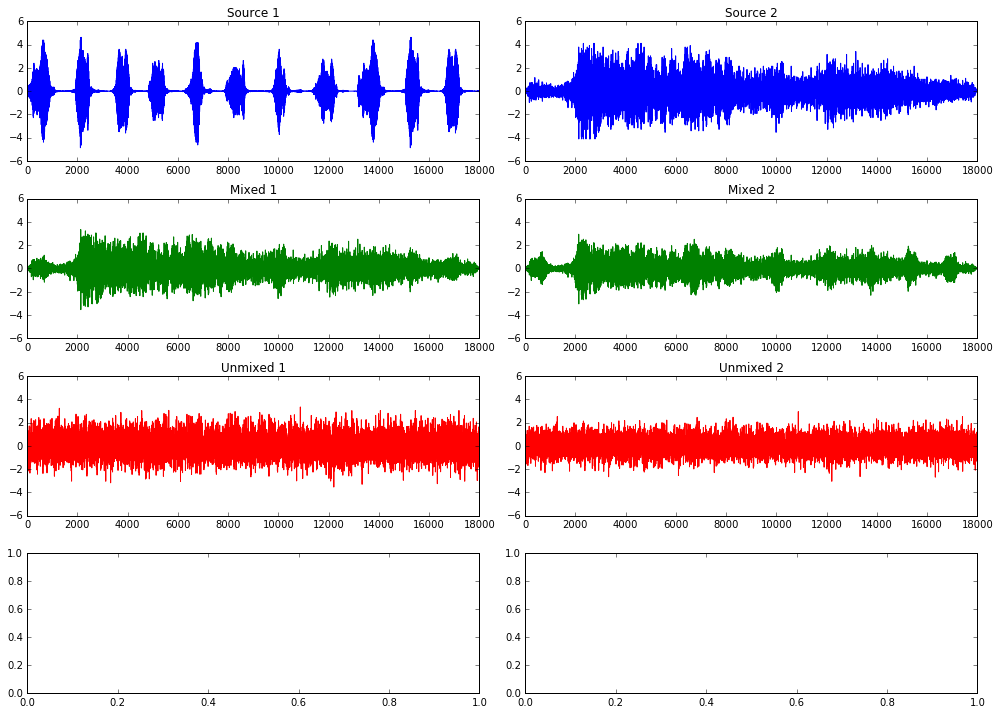

In [22]:
def playAndPlot(sound, ax, **kwargs):
    ax.plot(sound, **kwargs)
    if 'label' in kwargs:
        ax.set_title(kwargs['label'])
    ax.set_ylim(-6,6)
    filename = 'temp.wav'
    scipy.io.wavfile.write(filename, 8192, sound)
#     os.system('afplay '+filename)
#     os.system('mpg123 '+filename)
#     os.system('start '+filename)

#original sources    

fig, ax = plt.subplots(4,2, figsize=(14, 10))

playAndPlot(s1,ax[0,0], color='blue', label='Source 1')
playAndPlot(s2,ax[0,1], color='blue', label='Source 2')
playAndPlot(x0[0,:],ax[1,0], color='green', label='Mixed 1')
playAndPlot(x0[1,:],ax[1,1], color='green', label='Mixed 2')
playAndPlot(x[0,:],ax[2,0], color='red', label='Unmixed 1')
playAndPlot(x[1,:],ax[2,1], color='red', label='Unmixed 2')

fig.tight_layout()


In [ ]:
print(x0[1,:])
print(x0[0,:])
